Loading: ./tl_2020_50_tract/tl_2020_50_tract.shp
Loading: ./tl_2020_15_tract/tl_2020_15_tract.shp
Loading: ./tl_2020_28_tract/tl_2020_28_tract.shp
Loading: ./tl_2020_49_tract/tl_2020_49_tract.shp
Loading: ./tl_2020_31_tract/tl_2020_31_tract.shp
Loading: ./tl_2020_33_tract/tl_2020_33_tract.shp
Loading: ./tl_2020_17_tract/tl_2020_17_tract.shp
Loading: ./tl_2020_56_tract/tl_2020_56_tract.shp
Loading: ./tl_2020_13_tract/tl_2020_13_tract.shp
Loading: ./tl_2020_72_tract/tl_2020_72_tract.shp
Loading: ./tl_2020_37_tract/tl_2020_37_tract.shp
Loading: ./tl_2020_08_tract/tl_2020_08_tract.shp
Loading: ./tl_2020_35_tract/tl_2020_35_tract.shp
Loading: ./tl_2020_54_tract/tl_2020_54_tract.shp
Loading: ./tl_2020_11_tract/tl_2020_11_tract.shp
Loading: ./tl_2020_69_tract/tl_2020_69_tract.shp
Loading: ./tl_2020_32_tract/tl_2020_32_tract.shp
Loading: ./tl_2020_16_tract/tl_2020_16_tract.shp
Loading: ./tl_2020_53_tract/tl_2020_53_tract.shp
Loading: ./tl_2020_29_tract/tl_2020_29_tract.shp
Loading: ./tl_2020_5

<Axes: >

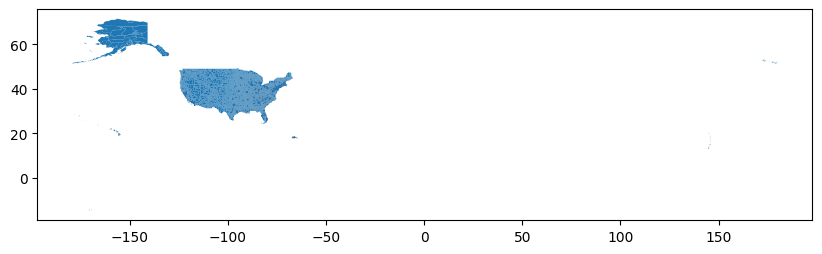

In [2]:
import geopandas as gpd
import os
import pandas as pd

# Set the base directory that contains all the tl_2020_xx_tract folders
base_dir = '.'

# Initialize a list to store each state's GeoDataFrame
gdf_list = []

# Loop through all folders in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    # Check if it's a tract folder
    if os.path.isdir(folder_path) and folder_name.endswith('_tract'):
        # Construct the shapefile path (e.g., tl_2020_01_tract/tl_2020_01_tract.shp)
        shapefile_name = folder_name + '.shp'
        shapefile_path = os.path.join(folder_path, shapefile_name)
        
        # Check if the shapefile exists and read it
        if os.path.exists(shapefile_path):
            print(f'Loading: {shapefile_path}')
            gdf = gpd.read_file(shapefile_path)
            gdf_list.append(gdf)

# Concatenate all the state GeoDataFrames into one national-level GeoDataFrame
merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)

# Optionally, save the merged result as a new shapefile
merged_gdf.to_file("national_tracts_2020.shp")


